# IMPORT LIBARARIES

In [67]:
import numpy as np
import pandas as pd


from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix,classification_report
from sklearn.metrics import accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# check outlier

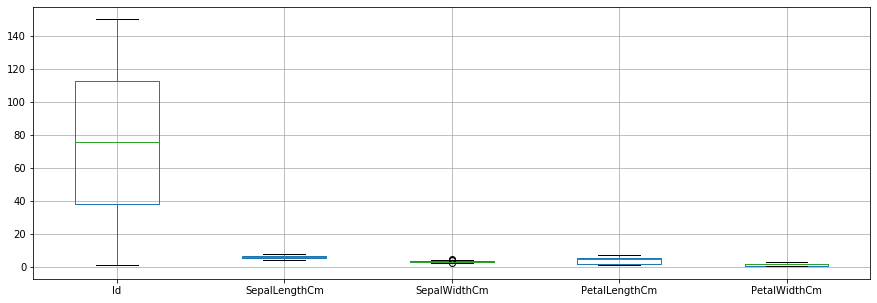

In [15]:
plt.figure(figsize=(15,5))
df.boxplot()

In [8]:
df['Id'].nunique()

150

In [ ]:
column_list=['Id']

In [10]:
df['SepalLengthCm'].nunique()

35

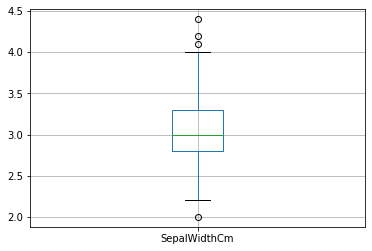

In [18]:
df[['SepalWidthCm']].boxplot()

In [24]:
from scipy import stats
thresh=3
zscore=abs(stats.zscore(df[['SepalWidthCm']]))
oulier_index=np.where(zscore>thresh)
df['SepalWidthCm'].iloc[oulier_index]

IndexingError: Too many indexers

In [25]:
df.drop('Id',axis=1,inplace=True)

In [26]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [29]:
df.isna().sum()/df.shape[0]*100

SepalLengthCm    0.0
SepalWidthCm     0.0
PetalLengthCm    0.0
PetalWidthCm     0.0
Species          0.0
dtype: float64

In [31]:
df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [32]:
df['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2},inplace=True)

In [33]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


In [35]:
y=df['Species']
x=df.drop(['Species'],axis=1)

In [37]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [48]:
# trian_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,stratify=y,test_size=0.2)

In [39]:
x_train.shape

(120, 4)

In [40]:
x_test.shape

(30, 4)

In [41]:
x.shape

(150, 4)

In [42]:
y.shape

(150,)

In [43]:
y_train.shape

(120,)

In [44]:
y_train.value_counts()

2    40
1    40
0    40
Name: Species, dtype: int64

In [49]:
y_train.value_counts()

2    40
1    40
0    40
Name: Species, dtype: int64

# model Training

In [50]:
lr_clf=LogisticRegression()
lr_clf.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# evaluation

In [52]:
y_pred=lr_clf.predict(x_test)


,Actual value,Predict value
107,2,2
9,0,0
98,1,1
11,0,0
43,0,0
0,0,0
148,2,2
111,2,2
121,2,2
76,1,1


In [53]:
df1=pd.DataFrame({'Actual value':y_test,'Predict value':y_pred})   #as value are match there is chance of higher accuracy
df1.head(10)

,Actual value,Predict value
107,2,2
9,0,0
98,1,1
11,0,0
43,0,0
0,0,0
148,2,2
111,2,2
121,2,2
76,1,1


In [61]:
# accuracy on testing dataset
conf_matrix=confusion_matrix(y_test,y_pred)
print("confusion_matrix\n",conf_matrix)

confusion_matrix
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


In [68]:
class_report= classification_report(y_test,y_pred)

print("classification_report \n",class_report)

classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [69]:
multi_conf_matrix=multilabel_confusion_matrix(y_test,y_pred)
print("multilabel_confusion_matrix is : \n",multi_conf_matrix)

multilabel_confusion_matrix is : 
 [[[20  0]
  [ 0 10]]

 [[20  0]
  [ 1  9]]

 [[19  1]
  [ 0 10]]]


In [70]:
accuracy=accuracy_score(y_test,y_pred)
print("accuracy_score is : \n",accuracy)

accuracy_score is : 
 0.9666666666666667


In [73]:
# accuracy on training dataset

y_pred_train=lr_clf.predict(x_train)

conf_matrix=confusion_matrix(y_train,y_pred_train)
print("confusion_matrix\n",conf_matrix)

class_report= classification_report(y_train,y_pred_train)
print("\n classification_report \n",class_report)

accuracy=accuracy_score(y_train,y_pred_train)
print("\n accuracy_score is : \n",accuracy)

confusion_matrix
 [[40  0  0]
 [ 0 37  3]
 [ 0  1 39]]

 classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.93      0.95        40
           2       0.93      0.97      0.95        40

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120


 accuracy_score is : 
 0.9666666666666667
